# illustrates the use of the `proxy` and `composite` classes

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from itertools import chain

In [3]:
proxies_num = pd.read_excel('./data/ProxiesLIANZSWP.xlsx', sheetname='numerical')

In [4]:
proxies_num.head()

,Site,Lat,Long,Anom,dataset,variable
0,Rarotonga,-21.230000,-159.820000,0.60,ersst,sst
1,Amedee,-22.480000,166.470000,-0.26,ersst,sst
2,Oroko,-43.222615,170.307329,-0.42,vcsn,TMean
3,Greenlaw,-43.006108,171.419497,-0.26,vcsn,TMean
4,Crow,-43.346222,170.998122,-0.62,vcsn,TMean


In [5]:
proxies_cat = pd.read_excel('./data/ProxiesLIANZSWP.xlsx', sheetname='categorical')

In [6]:
proxies_cat.head()

,Site,Lat,Long,Anom,dataset,variable
0,Washington Isl.,4.686322,-160.387482,WB,gpcp,Rain


In [7]:
import sys
sys.path.append('/Users/nicolasf/CODE/paleopy/')

In [8]:
from paleopy.core.proxy import proxy
from paleopy.core.composite import composite
from paleopy.plotting.scalar_plot import scalar_plot

### loops over the list of proxies and do the whole shebang

In [9]:
years_num = []

for index, row in proxies_num.iterrows():
                
        p = proxy(row.Site, row.Long, row.Lat, row.dataset, row.variable, 'DJF', value = row.Anom, \
                  calc_anoms=True, detrend=True)
                                
        # extract the time-series
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season
        p.calculate_season()
        
        p.find_analogs()

        years_num.append(p.analog_years.tolist())
        
        p.proxy_repr(outfile=True)
        
        p.plot_season_ts(fname='./figures/'+p.sitename+".png")
                
years_num = list(chain.from_iterable(years_num))

Rarotonga(200.18, -21.23) --> sst[200.0, -22.0]: 87.56368858840081 km
Amedee(166.47, -22.48) --> sst[166.0, -22.0]: 71.98760982961697 km
Oroko(170.307329, -43.222615) --> TMean[170.29999999999998, -43.199999999999996]: 2.5822452692301705 km
Greenlaw(171.419497, -43.006108) --> TMean[171.4, -43.0]: 1.7237375830879502 km
Crow(170.998122, -43.346222) --> TMean[171.0, -43.35]: 0.44641812756074506 km
Cameron(171.505139, -42.934067) --> TMean[171.5, -42.949999999999996]: 1.8192403316195496 km
Avoca(171.405812, -43.043031) --> TMean[171.4, -43.05]: 0.9069296145614849 km
Temple(169.709872, -44.146466) --> TMean[169.7, -44.15]: 0.8796866025775316 km
Hopkins(169.887499, -43.942569) --> TMean[169.9, -43.949999999999996]: 1.2970287700020637 km
Turnbull(169.850303, -43.877607) --> TMean[169.85, -43.9]: 2.488542980472772 km
Jollie(170.33, -43.697778) --> TMean[170.35, -43.699999999999996]: 1.6256872192126688 km
Cass(170.315493, -43.652675) --> TMean[170.29999999999998, -43.65]: 1.2806903178437616 km

In [10]:
p.proxy_repr(pprint=True)

{
sitename:Taramakau
coords:(171.486667, -42.899444)
season:DJF
dataset:vcsn
variable:TMean
calc_anoms:True
detrend:True
value:-0.69
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[171.5, -42.9]
distance_point:1.0871204462090915
trend_params:{'slope': 0.0022321425789443941, 'sterr': 0.014993356834044997, 'intercept': -4.6313714258405376, 'rval': 0.88255799290693626, 'pval': 0.025907188825487835}
category:WB
analog_years:[1980, 1983, 1984, 1993, 2012, 2013, 2014]
}


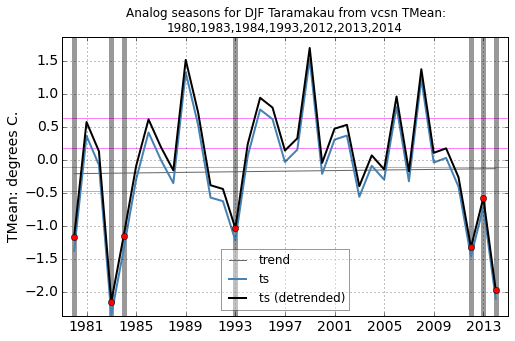

In [11]:
p.plot_season_ts(fname=None)

In [12]:
years_cat = []

for index, row in proxies_cat.iterrows():
                    
        p = proxy(row.Site, row.Long, row.Lat, row.dataset, row.variable, 'DJF', value = row.Anom, calc_anoms=True, detrend=True)
                        
        # extract the time-series
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season
        p.calculate_season()
        
        p.find_analogs()

        p.proxy_repr(outfile=True)
        
        years_cat.append(p.analog_years.tolist())
        
years_cat = list(chain.from_iterable(years_cat))

Washington Isl.(199.612518, 4.686322) --> Rain[198.75, 3.75]: 141.2904361997061 km


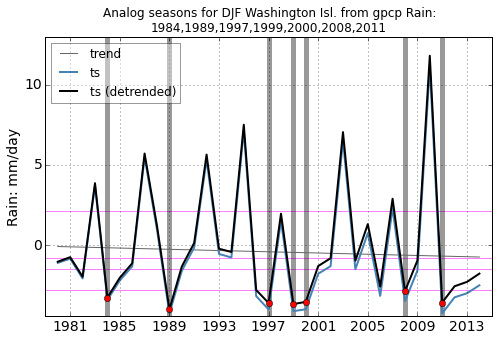

In [13]:
p.plot_season_ts(fname=None)

In [14]:
years = years_num + years_cat

In [15]:
years = np.array(years)

In [16]:
years_df = pd.DataFrame(years, columns=['analogs'])

In [17]:
pd.value_counts(years_df['analogs'])

1993    15
1991    15
1985    14
1982    13
2013    11
2012     9
2009     9
1986     8
1988     8
2005     8
2004     6
2003     6
1992     6
1984     6
2014     6
2002     5
1983     5
2011     5
1987     4
1980     4
1997     4
2000     3
2001     3
2006     2
1999     2
1989     1
1998     1
2007     1
2008     1
2010     1
dtype: int64

In [18]:
np.unique(np.sort(years_df['analogs'].values))

array([1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1991, 1992,
       1993, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [19]:
years_df.to_csv('./outputs/years_analogs_DJF.csv')

In [20]:
p.analog_years

array([1984, 1989, 1997, 1999, 2000, 2008, 2011], dtype=int32)

### instantiate the composite class with the proxy object and the dataset + variable to composite

In [21]:
compos = composite(p, 'ersst', 'sst').composite()

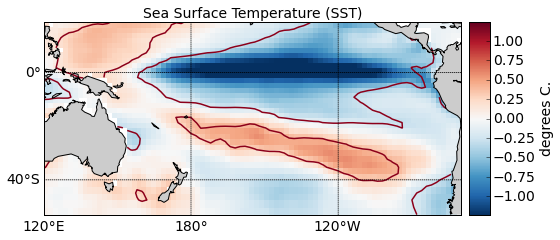

In [22]:
f = scalar_plot(compos, test=0.1, domain=[120, 290., -50., 20.], proj='merc').plot()

In [27]:
uwnd = composite(p, 'ncep', 'uwnd_200').composite()
# uwnd.close()

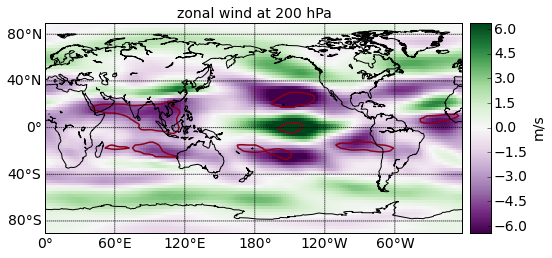

In [28]:
f = scalar_plot(uwnd, test=0.01).plot()

In [29]:
uwnd.dset

<xray.Dataset>
Dimensions:              (dates: 66, latitudes: 73, longitudes: 144, time: 804)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * time                 (time) datetime64[ns] 1948-01-01 1948-02-01 ...
  * latitudes            (latitudes) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
  * dates                (dates) datetime64[ns] 1949-02-01 1950-02-01 ...
Data variables:
    vwnd_1000            (time, latitudes, longitudes) float64 -0.23 -0.13 ...
    vwnd_200             (time, latitudes, longitudes) float64 1.67 1.63 1.6 ...
    uwnd_850             (time, latitudes, longitudes) float64 -1.92 -1.86 ...
    uwnd_1000            (time, latitudes, longitudes) float64 -2.18 -2.18 ...
    vwnd_850             (time, latitudes, longitudes) float64 1.4 1.49 1.57 ...
    uwnd_200             (time, latitudes, longitudes) float64 0.77 0.84 ...
    seas_var             (dates, latitudes, longitudes) float64 2.811 2.881 ...
    composite

In [30]:
nc = uwnd.dset

In [32]:
nc[['composite_anomalies','pvalues']]

<xray.Dataset>
Dimensions:              (latitudes: 73, longitudes: 144)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 ...
  * latitudes            (latitudes) float32 90.0 87.5 85.0 82.5 80.0 77.5 ...
Data variables:
    composite_anomalies  (latitudes, longitudes) float64 -0.02062 -0.03549 ...
    pvalues              (latitudes, longitudes) float64 0.9841 0.973 0.9641 ...

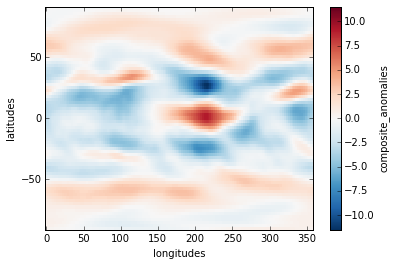

In [33]:
nc['composite_anomalies'].plot()